## Aproximacion de derivadas
Dada la función $f(x) = \sin(x)$, veremos como se comporta sus derivadas, y derivadas intermedias.

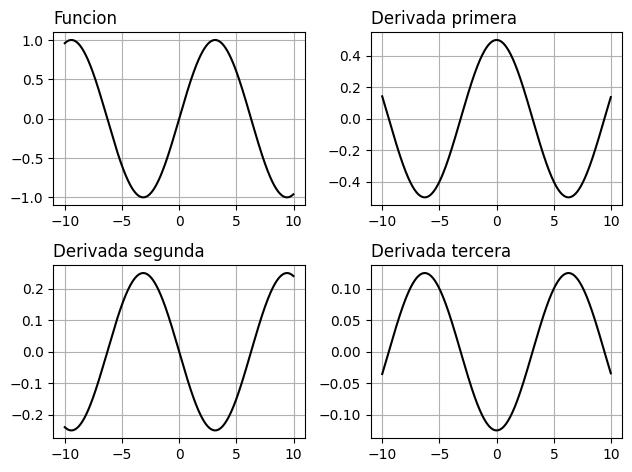

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import sin, cos, power
from numpy.fft import fft, ifft
from AproximacionesTradicionales import AproximacionTradicional

longitud = 20
cantidadPuntos = 1000
dx = longitud / cantidadPuntos
x = np.arange(-longitud / 2, longitud / 2, dx)

coeficiente = 1/2
valorFuncion = sin(coeficiente * x)
valorFuncionDerivadaPrimera = coeficiente * cos(coeficiente * x)
valorFuncionDerivadaSegunda = -power(coeficiente, 2) * sin(coeficiente * x)
valorFuncionDerivadaTercera = -power(coeficiente, 3) * cos(coeficiente * x)

transformacionFuncion = fft(valorFuncion)

plt.figure()

plt.subplot(2, 2, 1)
plt.plot(x, valorFuncion, 'k-')
plt.grid(True)
plt.title('Funcion', loc = 'left')
plt.tight_layout(pad=1.0)

plt.subplot(2, 2, 2)
plt.plot(x, valorFuncionDerivadaPrimera, 'k-')
plt.grid(True)
plt.title('Derivada primera', loc = 'left')
plt.tight_layout(pad=1.0)

plt.subplot(2, 2, 3)
plt.plot(x, valorFuncionDerivadaSegunda, 'k-')
plt.grid(True)
plt.title('Derivada segunda', loc = 'left')
plt.tight_layout(pad=1.0)

plt.subplot(2, 2, 4)
plt.plot(x, valorFuncionDerivadaTercera, 'k-')
plt.grid(True)
plt.title('Derivada tercera', loc = 'left')
plt.tight_layout(pad=1.0)

plt.show()

### Calculo de derivadas

In [3]:
def ValoresParaFFT(x, conShift = True):
    puntos = x
    if conShift:
        puntos = np.fft.fftshift(x)
    return np.abs(puntos) + 1

Veamos cada kernel:

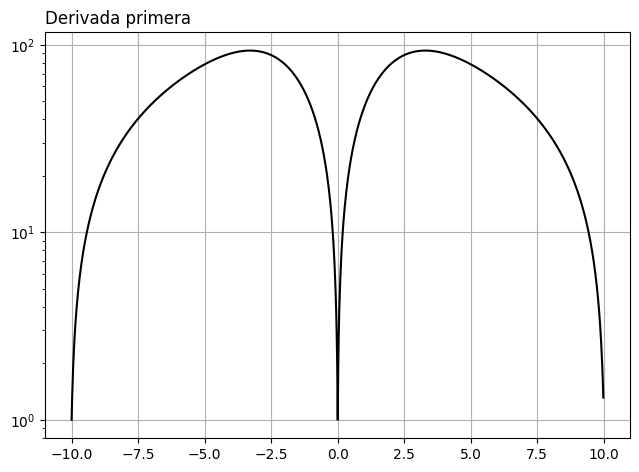

In [4]:
kernelDerivadaPrimera = AproximacionTradicional(x, dx, 1)

plt.figure()

plt.plot(x, ValoresParaFFT(kernelDerivadaPrimera, False), 'k-')
plt.grid(True)
plt.title('Derivada primera', loc = 'left')
plt.tight_layout(pad=1.0)
plt.yscale('log')

plt.show()

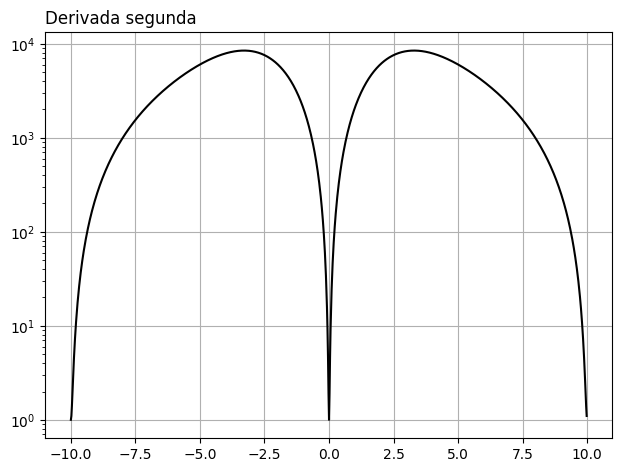

In [5]:
kernelDerivadaSegunda = AproximacionTradicional(x, dx, 2)

plt.figure()

plt.plot(x, ValoresParaFFT(kernelDerivadaSegunda, False), 'k-')
plt.grid(True)
plt.title('Derivada segunda', loc = 'left')
plt.tight_layout(pad=1.0)
plt.yscale('log')

plt.show()

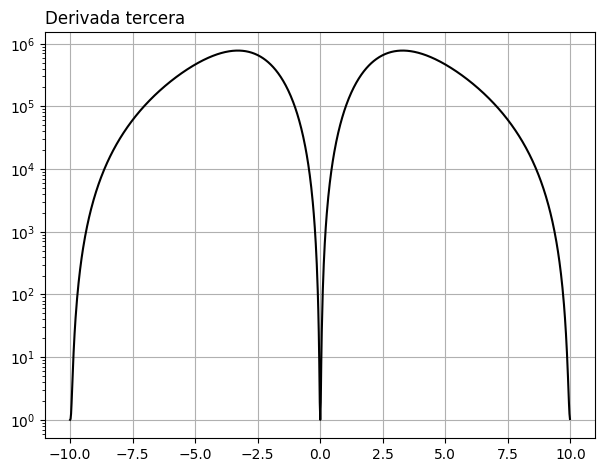

In [6]:
kernelDerivadaTercera = AproximacionTradicional(x, dx, 3)

plt.figure()

plt.plot(x, ValoresParaFFT(kernelDerivadaTercera, False), 'k-')
plt.grid(True)
plt.title('Derivada tercera', loc = 'left')
plt.tight_layout(pad=1.0)
plt.yscale('log')

plt.show()

y calculemos sus derivadas con respecto a su error

In [7]:
def MostrarFuncionYDiferencia(x, funcionAproximada, funcionAnalitica):
    diferencia = funcionAproximada - funcionAnalitica

    plt.figure()

    plt.subplot(2, 1, 1)
    plt.plot(x, diferencia, 'k-')
    plt.grid(True)
    plt.title('Diferencia', loc = 'left')
    plt.tight_layout(pad=1.0)

    plt.subplot(2, 1, 2)
    plt.plot(x, funcionAproximada, 'k-')
    plt.plot(x, funcionAnalitica, 'r-')
    plt.grid(True)
    plt.legend(['Función aproximada', 'Función analitica'])
    plt.title('Aproximacion', loc = 'left')
    plt.tight_layout(pad=1.0)

    plt.show()

    error = "{:.3e}".format(np.max(abs(diferencia)))
    print(f"Con un maximo de error del {error}")

In [8]:
def ReducirEspacio(valor, reduccion):
    return valor[reduccion : len(valor) - reduccion - 1]

reduccion = 20
xReducido = ReducirEspacio(x, reduccion)

Primera derivada:

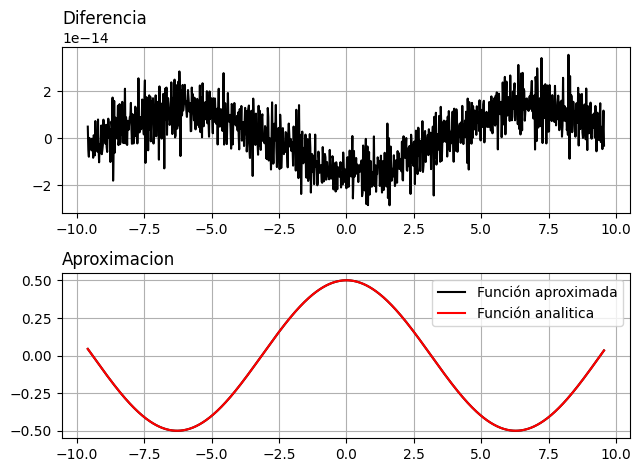

Con un maximo de error del 3.553e-14


In [9]:
valorAproximado = np.real(ifft(transformacionFuncion * kernelDerivadaPrimera))
valorAproximado = ReducirEspacio(valorAproximado, reduccion)

valorOriginal = ReducirEspacio(valorFuncionDerivadaPrimera, reduccion)
MostrarFuncionYDiferencia(xReducido, valorAproximado, valorOriginal)

Segunda derivada:

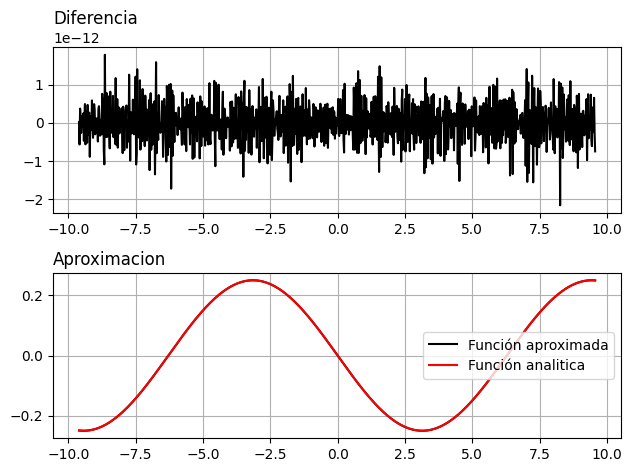

Con un maximo de error del 2.161e-12


In [10]:
valorAproximado = np.real(ifft(transformacionFuncion * kernelDerivadaSegunda))
valorAproximado = ReducirEspacio(valorAproximado, reduccion)

valorOriginal = ReducirEspacio(valorFuncionDerivadaSegunda, reduccion)
MostrarFuncionYDiferencia(xReducido, valorAproximado, valorOriginal)

Tercera derivada:

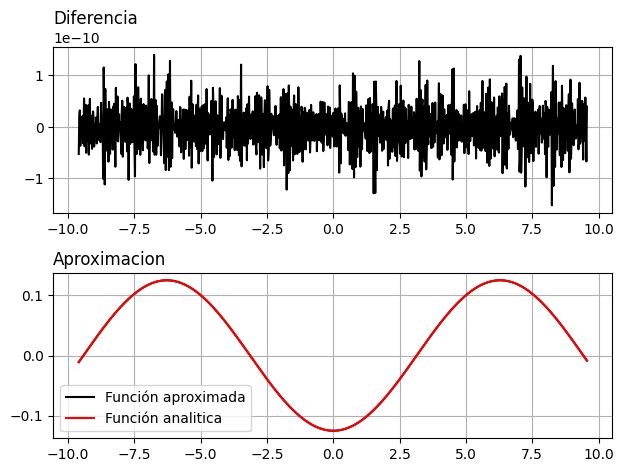

Con un maximo de error del 1.523e-10


In [11]:
valorAproximado = np.real(ifft(transformacionFuncion * kernelDerivadaTercera))
valorAproximado = ReducirEspacio(valorAproximado, reduccion)

valorOriginal = ReducirEspacio(valorFuncionDerivadaTercera, reduccion)
MostrarFuncionYDiferencia(xReducido, valorAproximado, valorOriginal)

### Derivadas intermedias

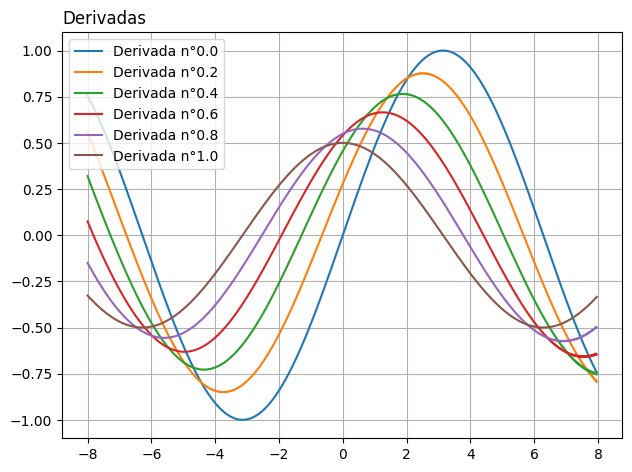

In [15]:
plt.figure()

plt.set_cmap('jet_r')
inicio = 0
final = 1
delta = 0.2

reducir = 100
xReducido = ReducirEspacio(x, reducir)

legends = []
for ordenDerivada in [inicio + i * delta for i in range(int((final - inicio) / delta) + 1)]:
    kernel = AproximacionTradicional(x, dx, ordenDerivada)
    valorAproximado = np.real(ifft(transformacionFuncion * kernel))
    valorAproximado = ReducirEspacio(valorAproximado, reducir)
    plt.plot(xReducido, valorAproximado)
    ordenDerivada = "{:.2}".format(ordenDerivada)
    legends.append(f'Derivada n°{ordenDerivada}')

plt.grid(True)
plt.title('Derivadas', loc = 'left')
plt.tight_layout(pad=1.0)
plt.legend(legends)

plt.show()